<a href="https://colab.research.google.com/github/BrianGirardiRice/Public/blob/main/HW4Q5-6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
sys.meta_path[:] = [f for f in sys.meta_path if "DaskFinder" not in str(f)]

!pip install numpy==1.24.3
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    import cirq

    print("installed cirq.")

import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations
from scipy.optimize import minimize
import random


Optimized Energy: -5.236064314842224


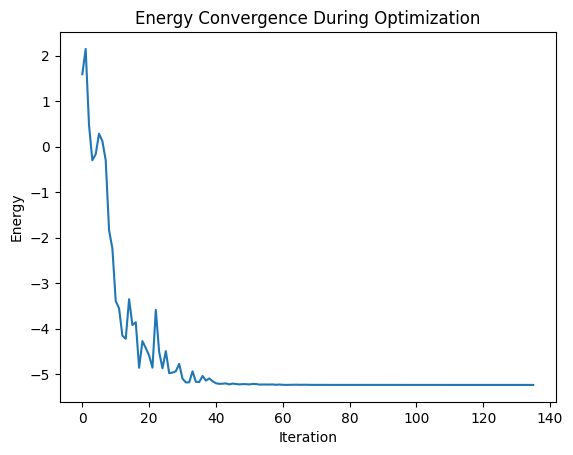

Final Optimized Energy: -5.236064314842224


In [ ]:
# Define qubits
qubits = [cirq.LineQubit(i) for i in range(4)]

def variational_circuit(params):
    circuit = cirq.Circuit()

    # Apply parameterized single-qubit rotation gates
    for i, qubit in enumerate(qubits):
        circuit.append(cirq.rx(params[i])(qubit))
        circuit.append(cirq.rz(params[i + len(qubits)])(qubit))

    # Add entangling gates (CNOT)
    for i in range(len(qubits) - 1):
        circuit.append(cirq.CNOT(qubits[i], qubits[i + 1]))

    return circuit


hamiltonian = cirq.PauliSum.from_pauli_strings([
    cirq.Z(qubits[0]) * cirq.Z(qubits[1]),
    cirq.X(qubits[0]) * cirq.X(qubits[1]),
    cirq.Y(qubits[0]) * cirq.Y(qubits[1]),
    cirq.Z(qubits[2]) * cirq.Z(qubits[3]),
    cirq.X(qubits[2]) * cirq.X(qubits[3]),
    cirq.Y(qubits[0]) * cirq.Z(qubits[1])
])

def expectation_value(params):
    circuit = variational_circuit(params)
    simulator = cirq.Simulator()
    result = simulator.simulate(circuit)
    state_vector = result.final_state_vector

    energy = np.real(hamiltonian.expectation_from_state_vector(
        state_vector, qubit_map={qubits[i]: i for i in range(len(qubits))}
    ))

    return energy

# Define cost function
def cost_function(params):
    return expectation_value(params)

# Initial parameters
initial_params = np.random.uniform(0, 2 * np.pi, 2 * len(qubits))

# Perform optimization using COBYLA method
result = minimize(cost_function, initial_params, method='COBYLA')

# Extract optimized parameters and energy
optimized_params = result.x
optimized_energy = result.fun

print("Optimized Energy:", optimized_energy)

# Track energy during optimization
energy_history = []
def callback(params):
    energy_history.append(cost_function(params))

# Perform optimization with callback
result_with_callback = minimize(cost_function, initial_params, method='COBYLA', callback=callback)

# Plot energy convergence
plt.plot(energy_history)
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.title('Energy Convergence During Optimization')
plt.show()

# Final optimized energy value
final_optimized_energy = result_with_callback.fun
print("Final Optimized Energy:", final_optimized_energy)

